In [1]:

from IPython.display import Image     #This is used for rendering images in the notebook

In [2]:
import numpy as np
from scipy.special import softmax 

### Step 1: Creating Inputs

In [3]:
print("Step 1: 3 inputs, dimension of the model is 4")
x =np.array([[1.0, 0.0, 1.0, 0.0],   # Input 1 (1,0,1,0)
             [0.0, 2.0, 0.0, 2.0],   # Input 2 (0,2,0,2)
             [1.0, 1.0, 1.0, 1.0]])  # Input 3 (1,1,1,1)
print(x)

Step 1: 3 inputs, dimension of the model is 4
[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


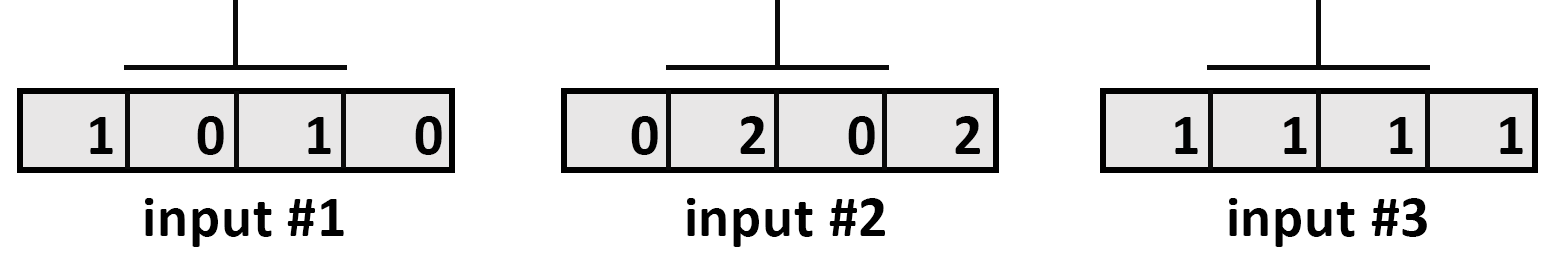

In [4]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_11.png', width=600) #This is used for rendering images in the notebook
     

### Step 2 Initializing the Weight Matrices

In [5]:
print("Step 2: weights, 3 x 4")
print("w_query")
w_query = np.array([[1,0,1],
                    [1,0,0],
                    [0,0,1],
                    [0,1,1]])
print(w_query)

Step 2: weights, 3 x 4
w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]


$W_{q}$ (or $Q_{w}$) is one of three weight matrices, and is used to train the queries. All three of these matrices are adjusted during the training of the model. These matrices serve to project the inputs into query, key, and value components of the sequence, respectively.

In [6]:
print("w_key")
w_key = np.array([[0,0,1],
                  [1,1,0],
                  [0,1,0],
                  [1,1,0]])
print(w_key)


w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]


$W_{k}$ (or $K_{w}$) is used to train the keys.

In [7]:
print("w_value")
w_value = np.array([[0,2,0],
                    [0,3,0],
                    [1,0,3],
                    [1,1,0]])
print(w_value)

w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


$W_{v}$ (or $V_{w}$) is used to train the values.

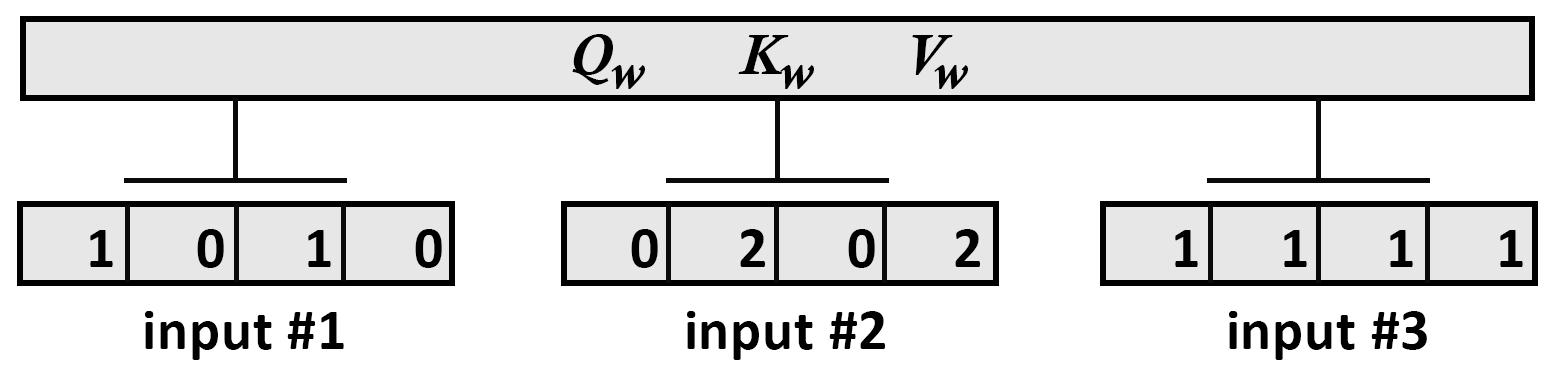

In [8]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_12.png', width=600) #This is used for rendering images in the notebook
     


### Step 3: Multiply to get $Q$, $K$, and $V$
We want to get the actual Queries, Keys, and Values, and we do this via the respective weights. 

In [9]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Queries: x * w_query")
Q=np.matmul(x,w_query)
print(Q)

Step 3: Matrix multiplication to obtain Q,K,V
Queries: x * w_query
[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]


In [10]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Keys: x * w_key")
K=np.matmul(x,w_key)
print(K)

Step 3: Matrix multiplication to obtain Q,K,V
Keys: x * w_key
[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]


In [11]:
print("Values: x * w_value")
V=np.matmul(x,w_value)
print(V)

Values: x * w_value
[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


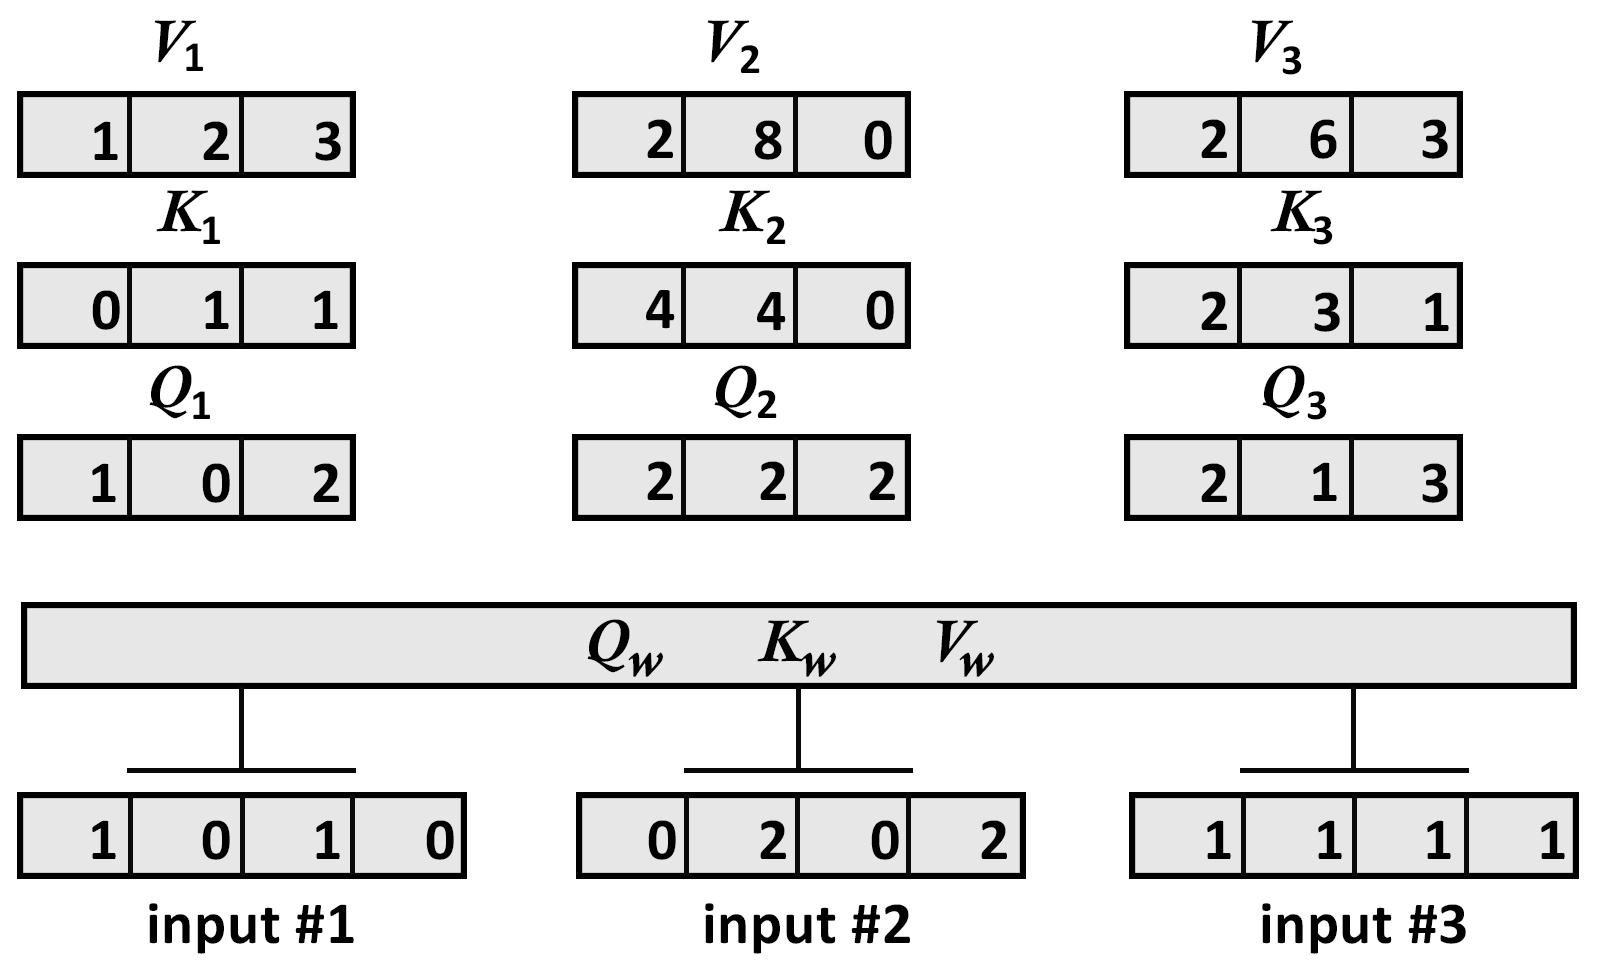

In [12]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_13.png', width=600) #This is used for rendering images in the notebook
     

We now have the $Q$, $K$, and $V$ values we need to calculate the attention scores. 

### Step 4: Scaled Attention Scores
The attention head now implements the original Transformer equation: Attention($Q$,$K$,$V$) = softmax($ \frac{QK^T}{\sqrt{d_k}}$)V

In [13]:
print("Step 4: Scaled Attention Scores")
k_d=1   #square root of k_d simplified to 1 for this example
attention_scores = (Q @ K.transpose())/k_d
print(attention_scores)

Step 4: Scaled Attention Scores
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


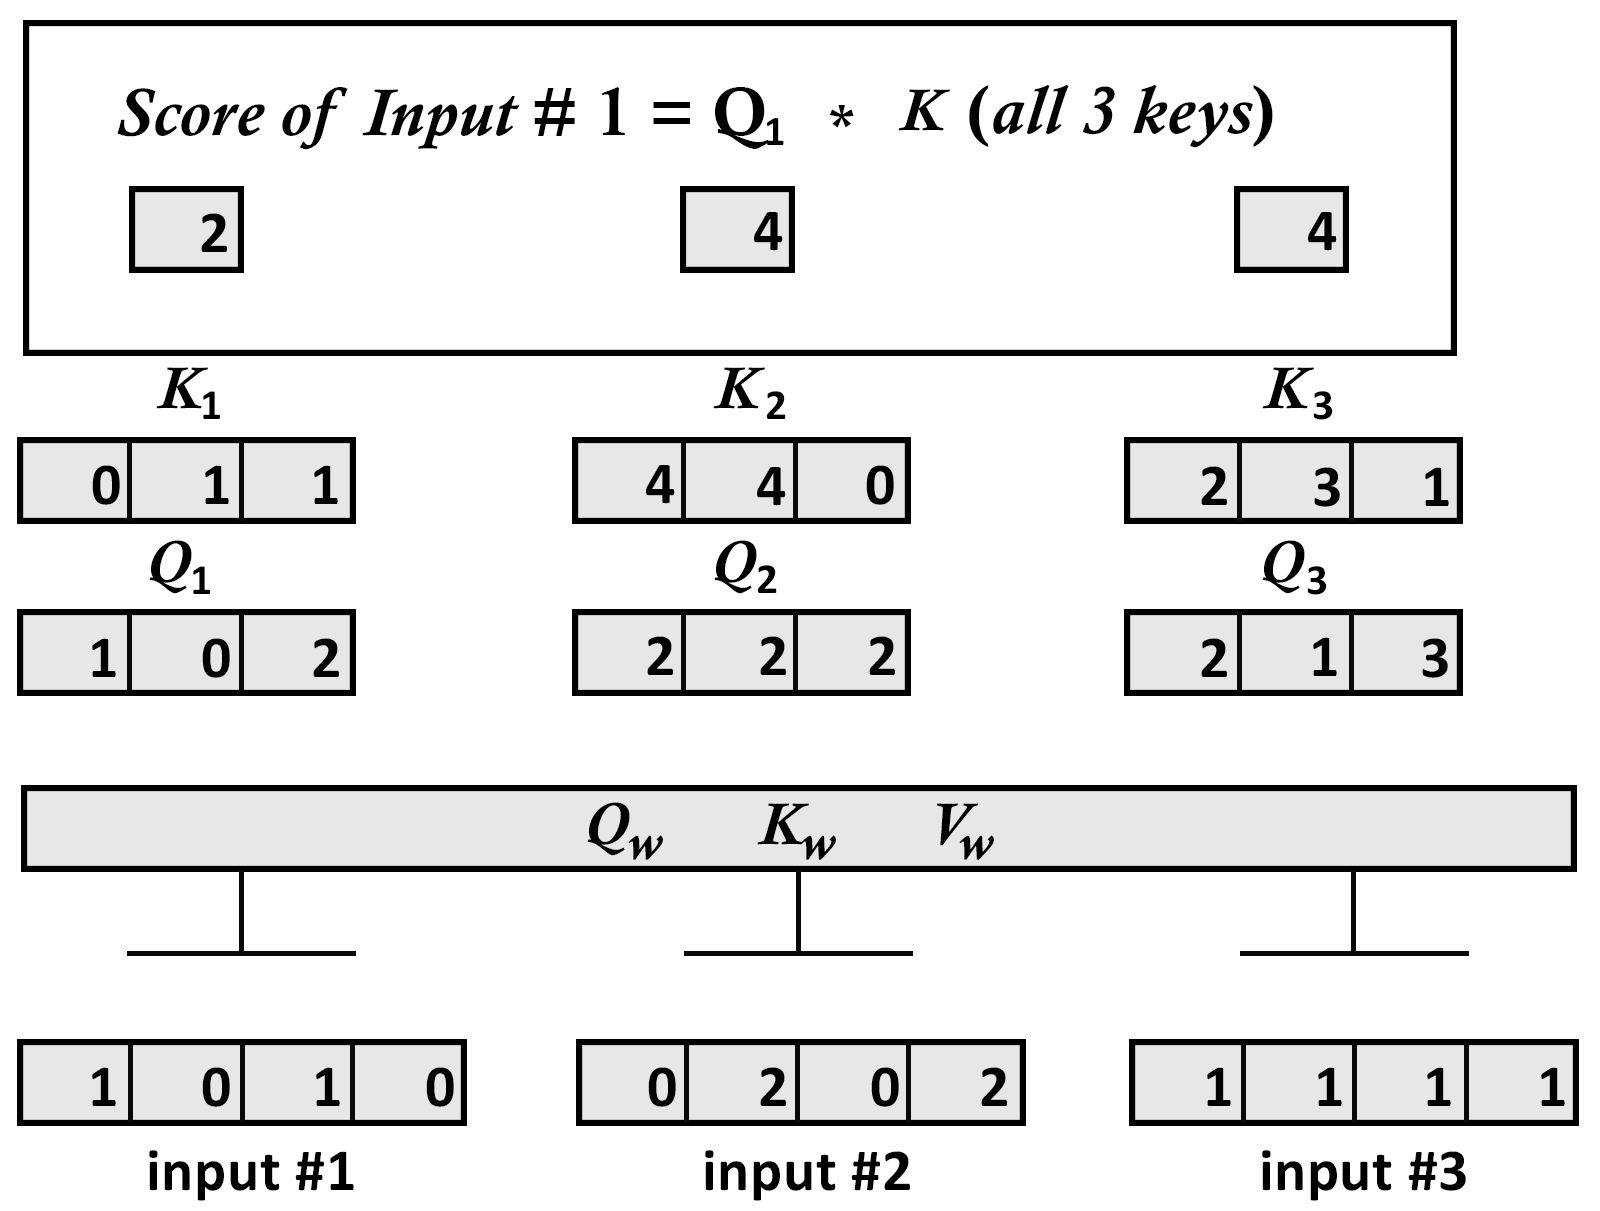

In [14]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_14.png', width=600) #This is used for rendering images in the notebook
     

### Step 5: Scaled softmax attention scores for each vector.
Now, we apply a softmax function to each intermediate attention score. This ought to be a matrix multiplication, but here let's zoom in on each individual vector.

In [15]:

print("Step 5: Scaled softmax attention_scores for each vector")
attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])
print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])

Step 5: Scaled softmax attention_scores for each vector
[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


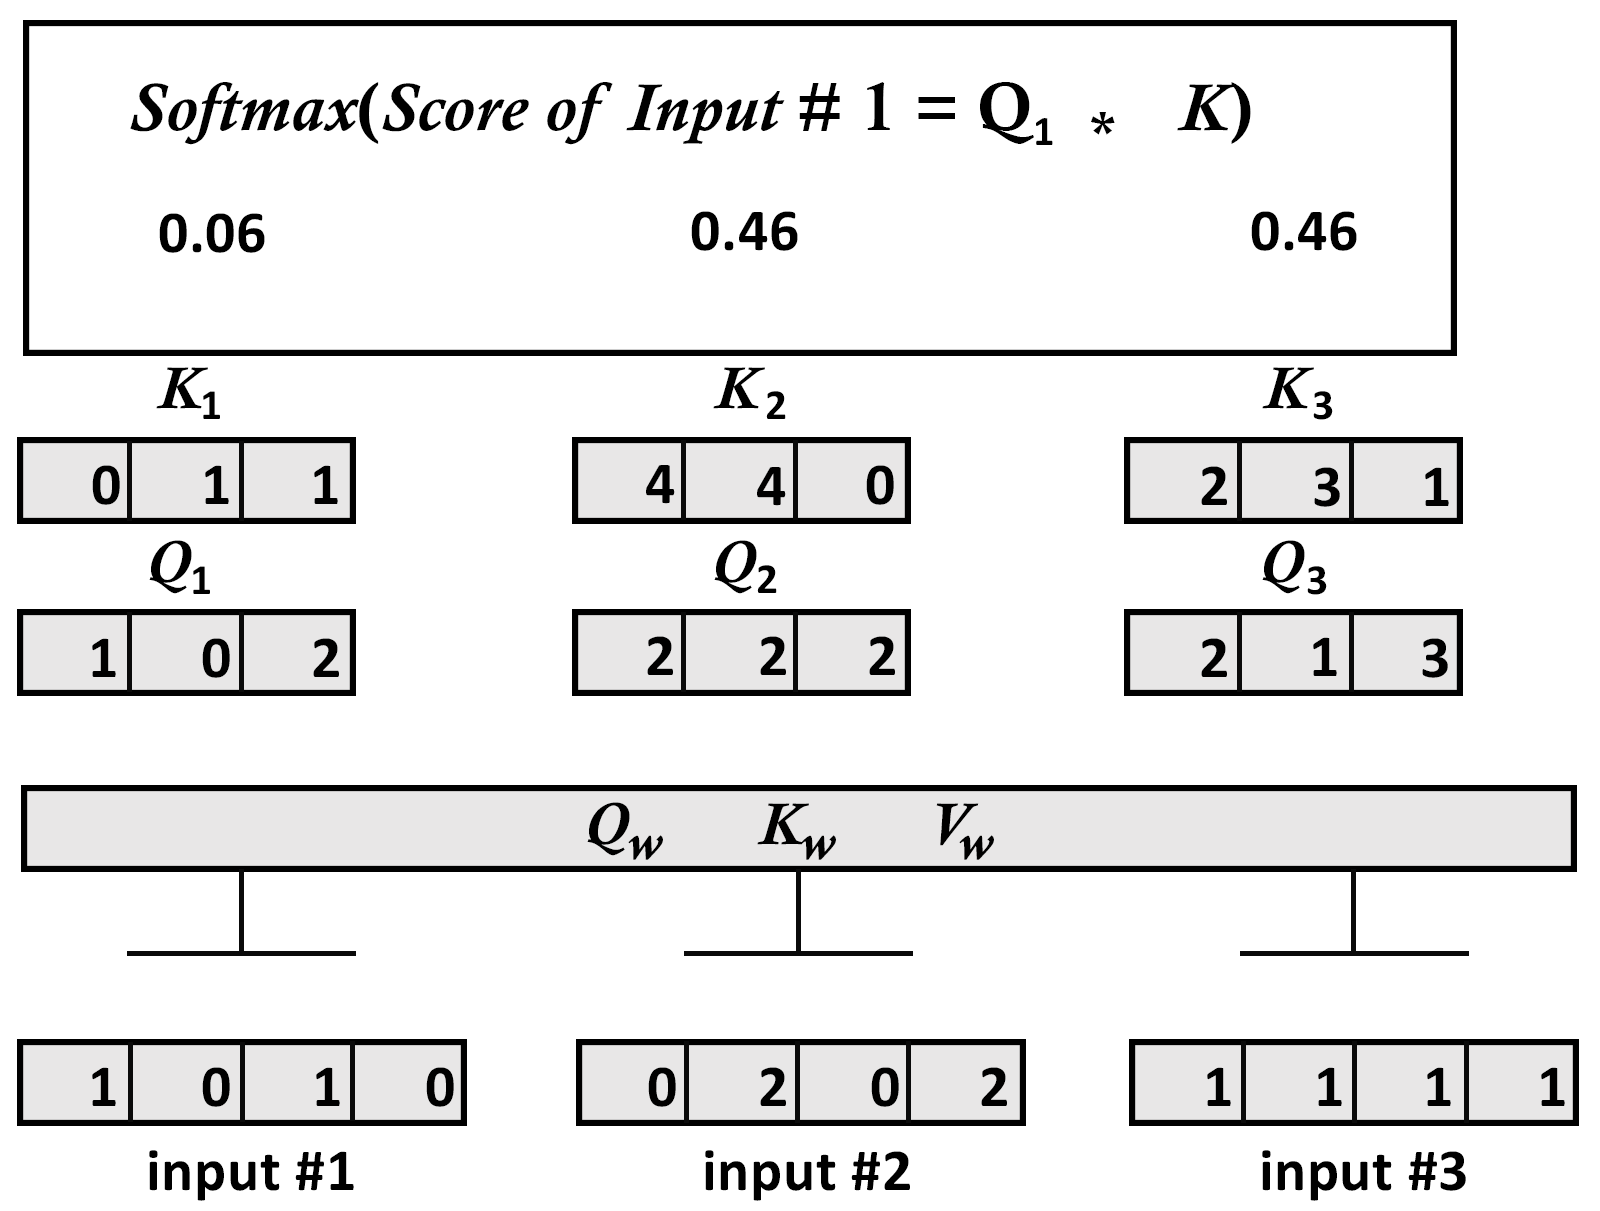

In [16]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_15.png', width=600) #This is used for rendering images in the notebook
     

### Step 6: Final Attention Representation

In [17]:

print("Step 6: attention value obtained by score1/k_d * V")
print(V[0])
print(V[1])
print(V[2])
print("Attention 1")
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)

print("Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)

print("Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)

Step 6: attention value obtained by score1/k_d * V
[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]
Attention 1
[0.06337894 0.12675788 0.19013681]
Attention 2
[0.93662106 3.74648425 0.        ]
Attention 3
[0.93662106 2.80986319 1.40493159]


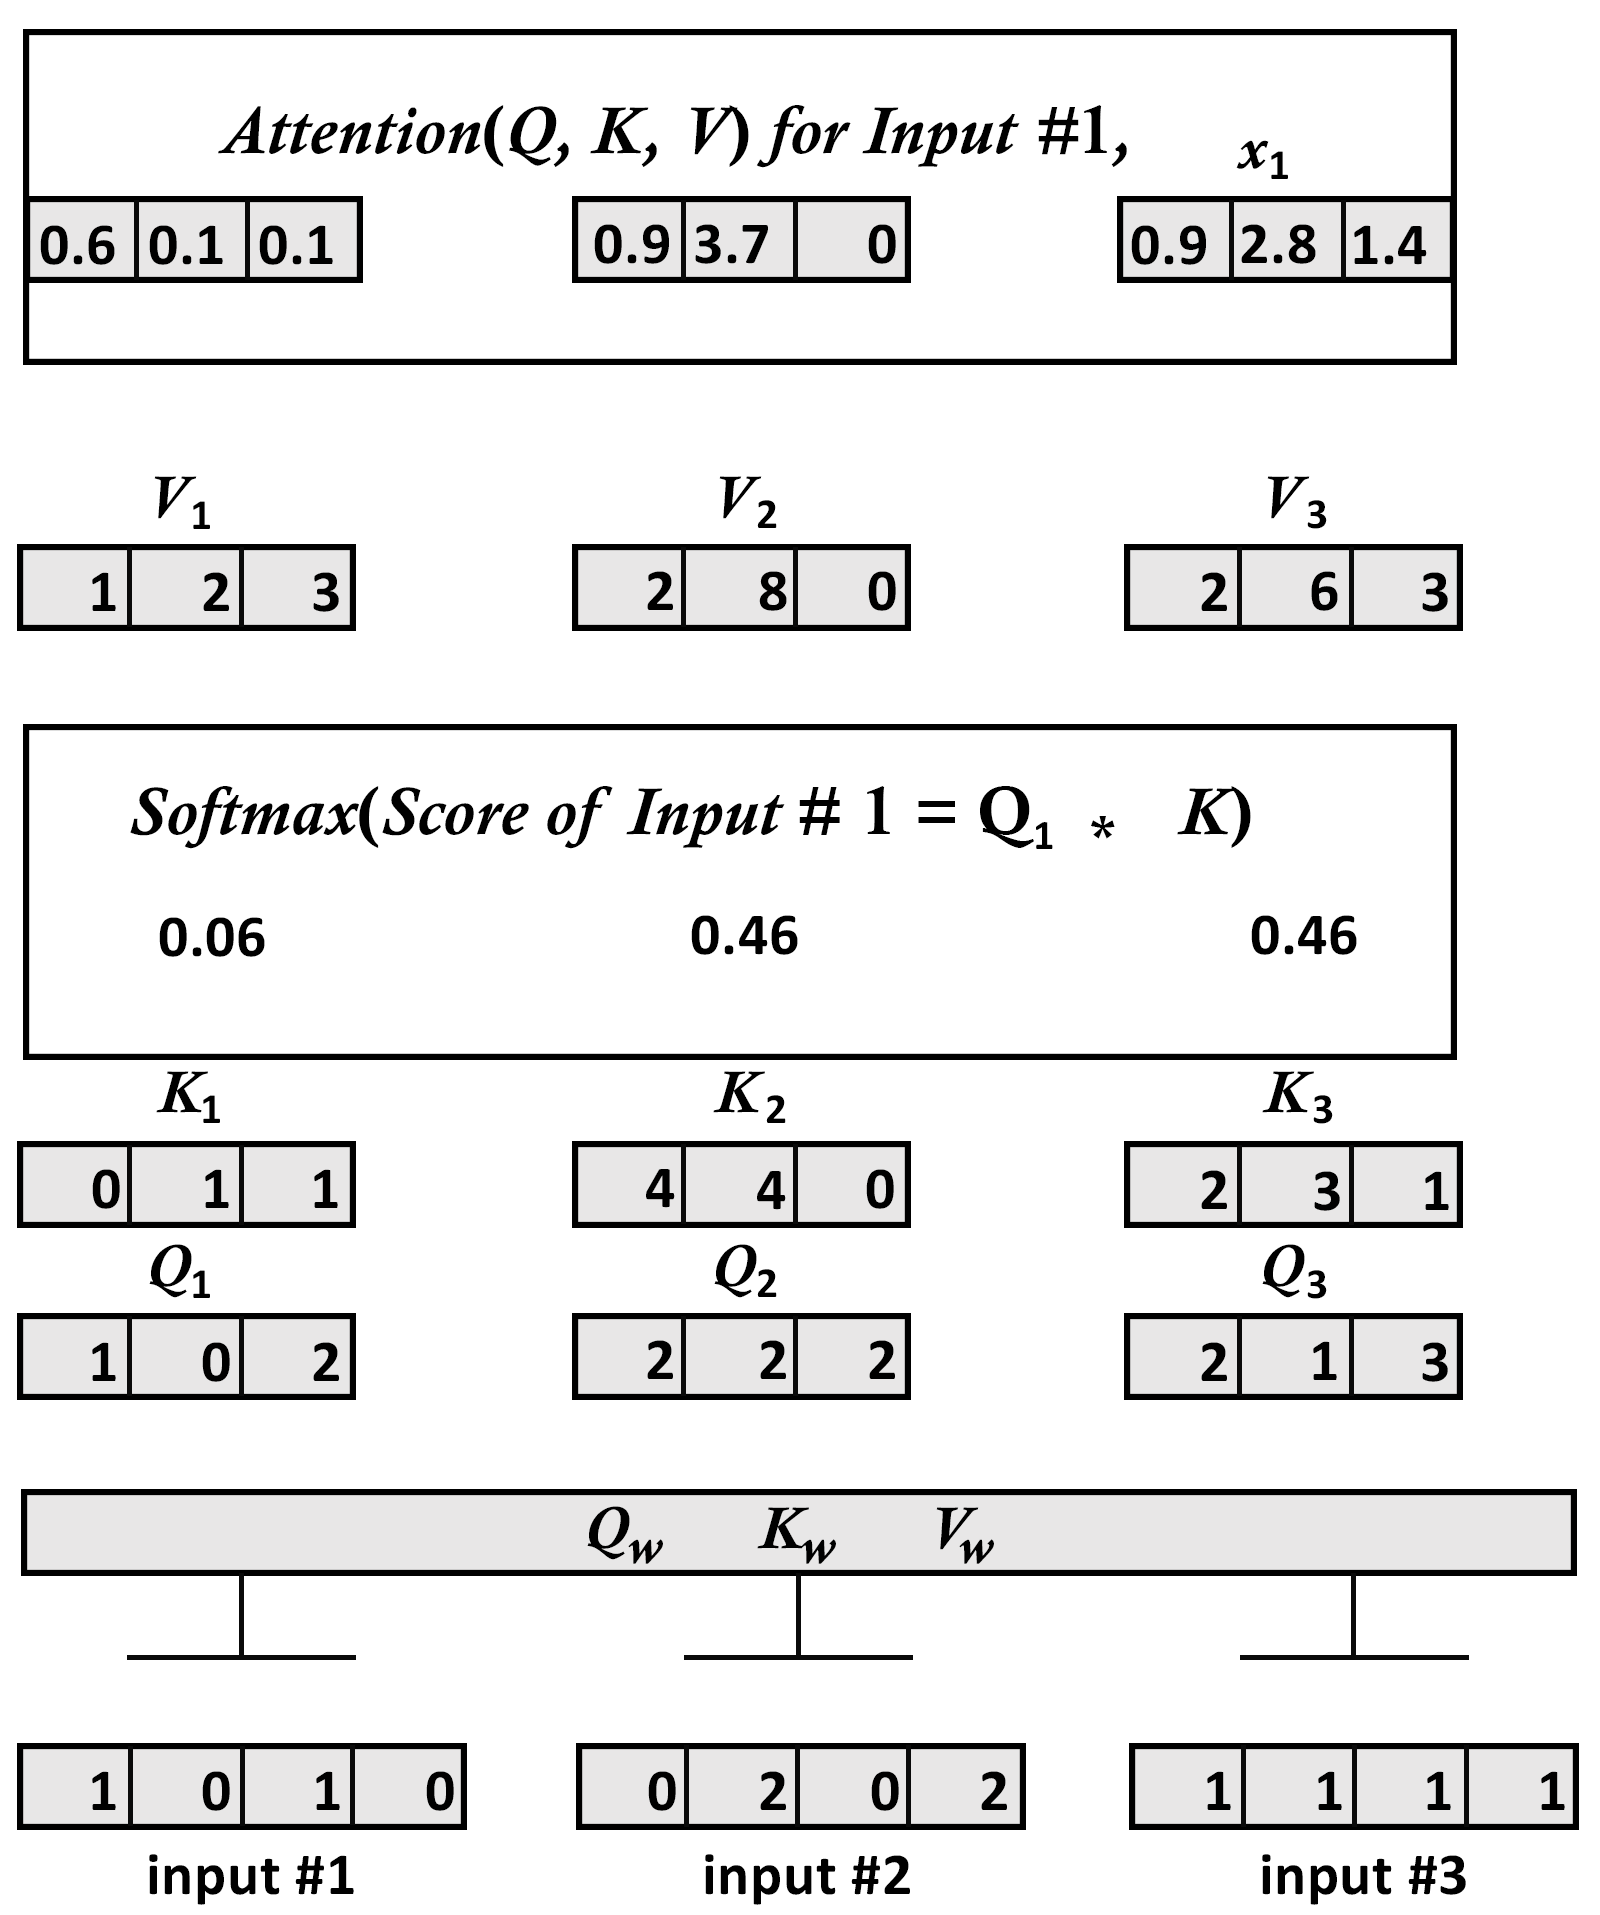

In [18]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_16.png', width=600) #This is used for rendering images in the notebook
     

### Step 7: Summing the Results
The three attention values of input 1 obtained will be summed to obtain the first line of the output matrix. 

In [19]:
print("Step 7: summed the results to create the first line of the output matrix")
attention_input1=attention1+attention2+attention3
print(attention_input1)

Step 7: summed the results to create the first line of the output matrix
[1.93662106 6.68310531 1.59506841]


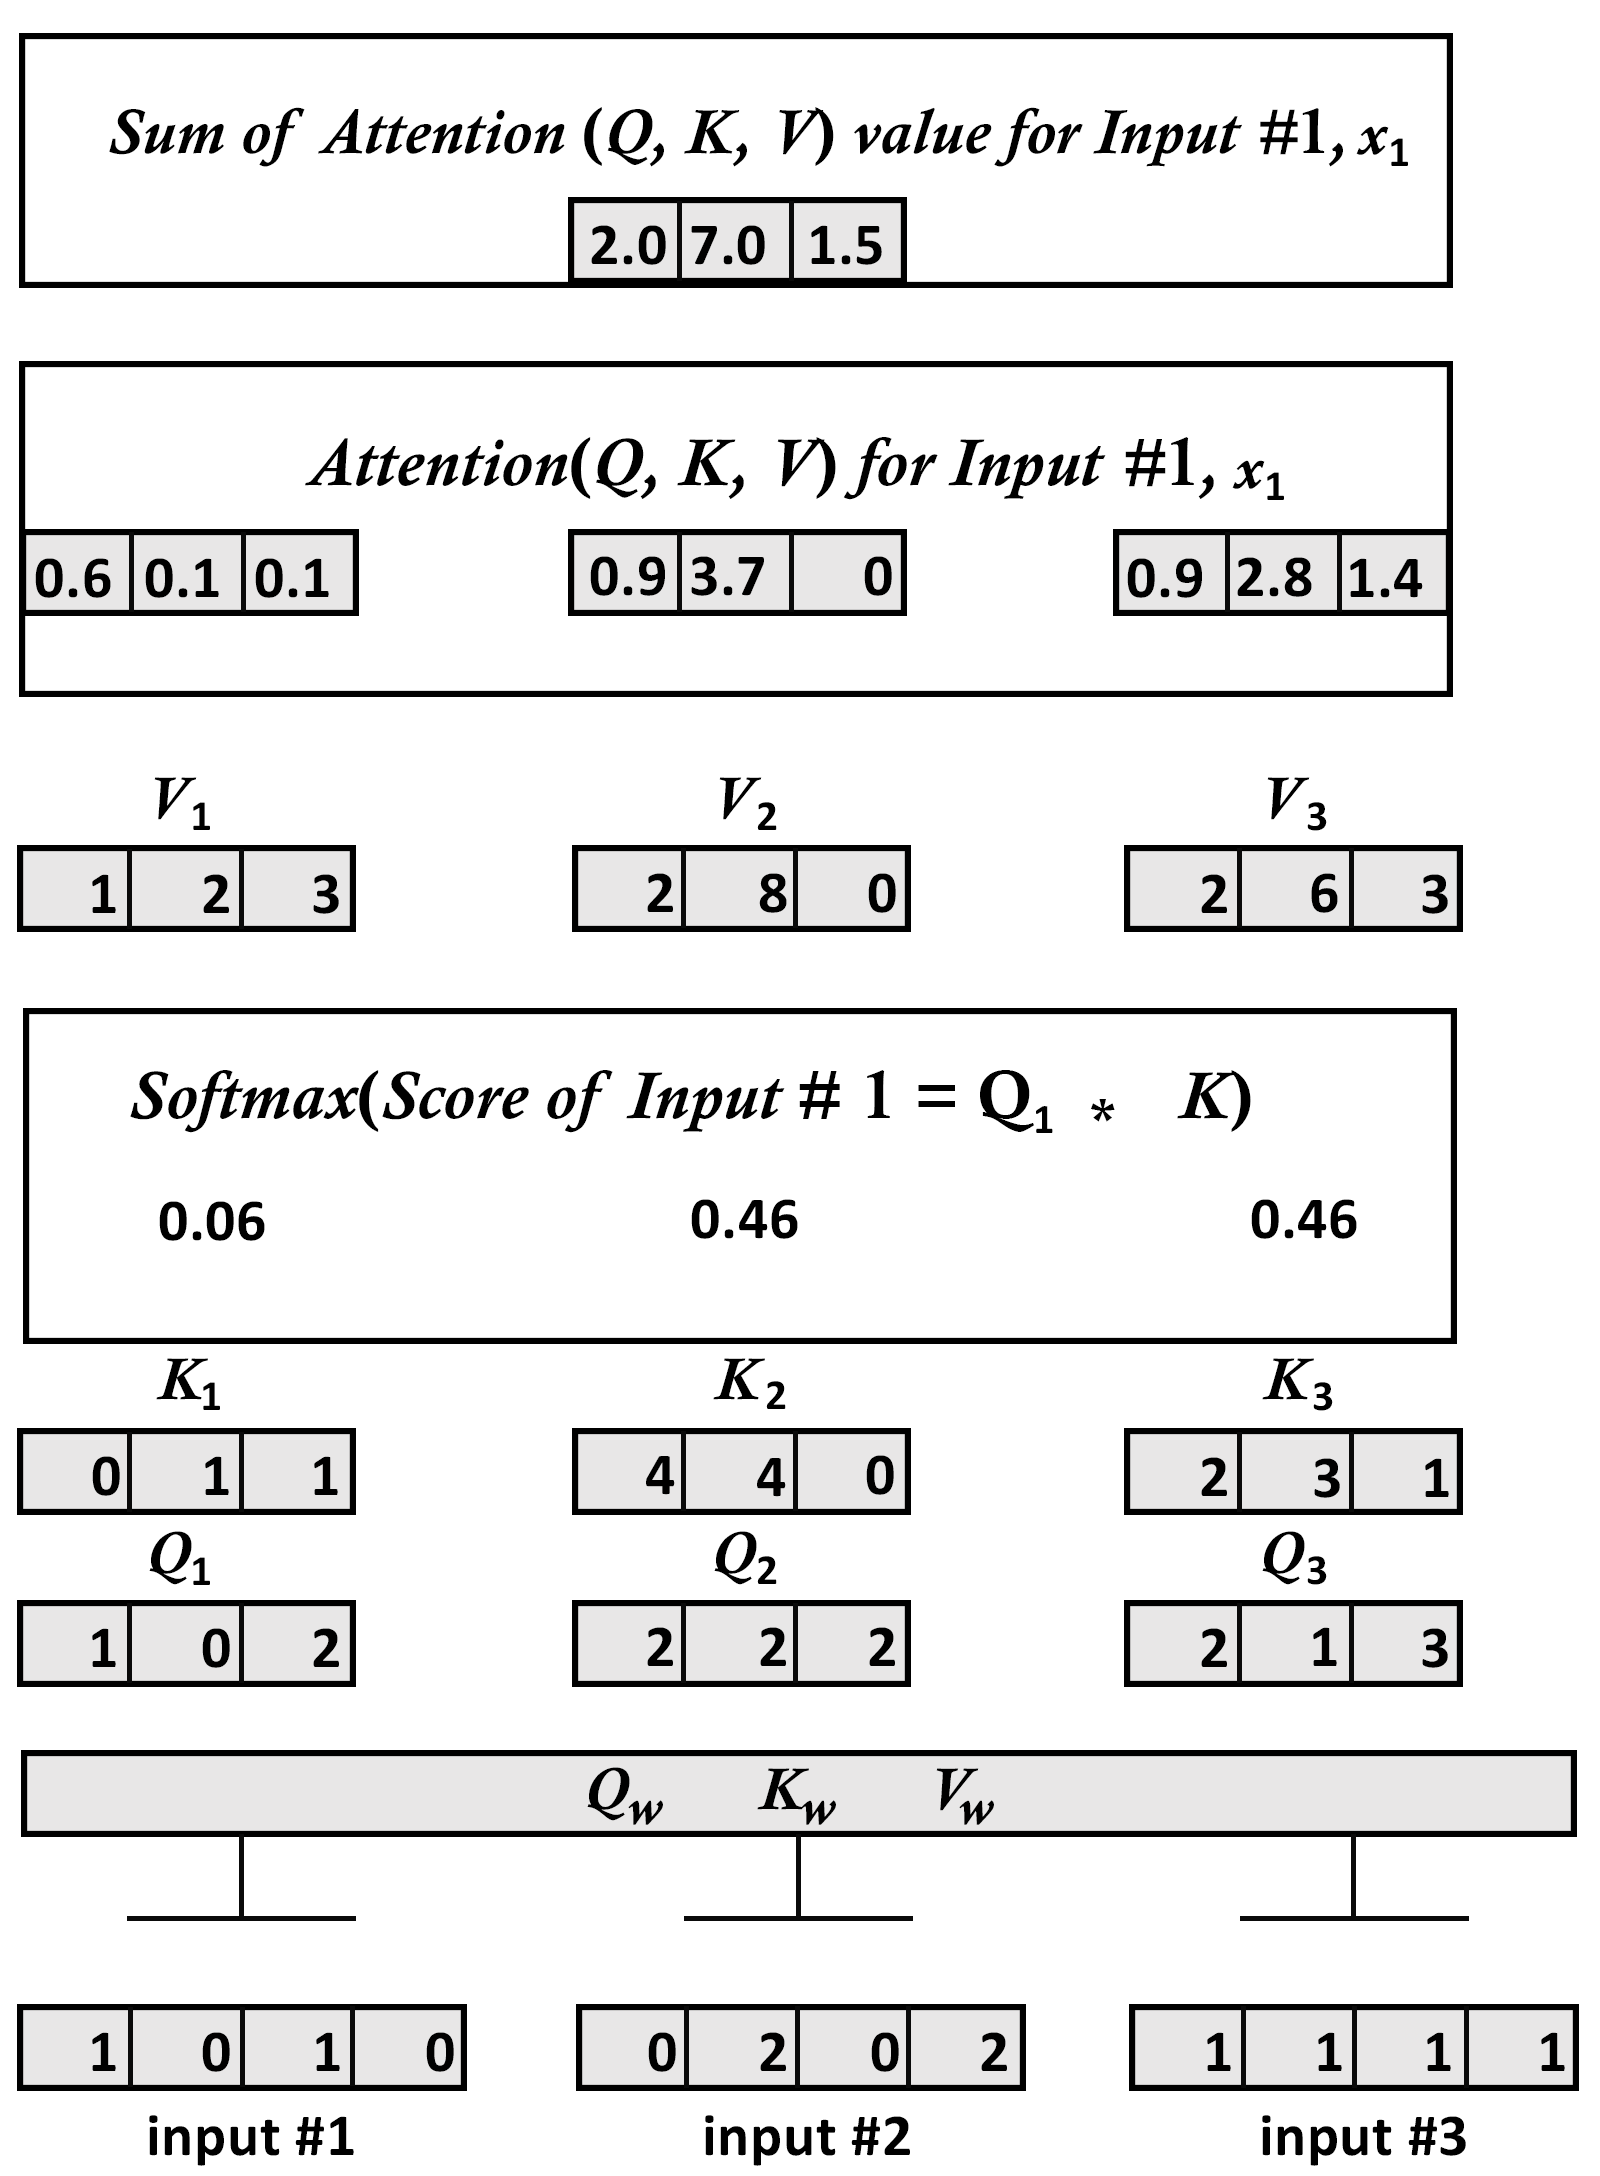

In [20]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_17.png', width=600) #This is used for rendering images in the notebook
     

### Step 8: Repeat 1-7 for All the inputs
The Transformer can now produce the attention values of input 2 and input 3 using the same methods we've laid out above. 

From now on, we'll assume we have three attention values with learned weights with d=64

In [21]:
print("Step 8: Step 1 to 7 for inputs 1 to 3")
#We assume we have 3 results with learned weights (they were not trained in this example)
#We assume we are implementing the original Transformer paper. We will have 3 results of 64 dimensions each
attention_head1=np.random.random((3, 64))
print(attention_head1)

Step 8: Step 1 to 7 for inputs 1 to 3
[[0.080172   0.86291615 0.73933675 0.12964464 0.59774423 0.89154586
  0.24549887 0.55241265 0.1478488  0.3098007  0.80424939 0.83172359
  0.85608139 0.90853566 0.70576791 0.27981559 0.594644   0.48289283
  0.54781966 0.16782228 0.40331986 0.21870218 0.27678175 0.35756512
  0.66313047 0.59251464 0.78092238 0.73860411 0.66553065 0.91051732
  0.43274513 0.76617773 0.29171399 0.4974617  0.88148893 0.43514672
  0.1847565  0.35297536 0.57248278 0.33025675 0.71493292 0.19573308
  0.84789245 0.72051402 0.0651777  0.61401801 0.90373251 0.33980887
  0.06162929 0.91015022 0.62390054 0.06612849 0.28958977 0.66070091
  0.96476965 0.9490557  0.89759147 0.4301834  0.64241616 0.51617485
  0.32559448 0.30026087 0.87407186 0.39611946]
 [0.45405897 0.16726143 0.755379   0.89259874 0.08221668 0.12323177
  0.98452571 0.5627701  0.548183   0.4074535  0.06978813 0.46919702
  0.17496688 0.5478678  0.78744664 0.06099498 0.19962305 0.27429036
  0.33805918 0.4860504  0.70053

### Step 9: Output of the heads of the Attention Sublayer

In [23]:
print("Step 9: We assume we have trained the 8 heads of the attention sub-layer")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("The shape of one head is ",z0h1.shape,"dimension of 8 heads",64*8)

Step 9: We assume we have trained the 8 heads of the attention sub-layer
The shape of one head is  (3, 64) dimension of 8 heads 512


### Concatenate the output of the Heads

In [24]:
print("Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model")
output_attention=np.hstack((z0h1,z1h2,z2h3,z3h4,z4h5,z5h6,z6h7,z7h8))
print(output_attention)

Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model
[[0.26912922 0.74633378 0.61370565 ... 0.80225965 0.09537167 0.47776104]
 [0.18758885 0.52313131 0.03797535 ... 0.96583799 0.52962699 0.37427967]
 [0.77729717 0.63497256 0.67851384 ... 0.88728986 0.44582844 0.86073667]]


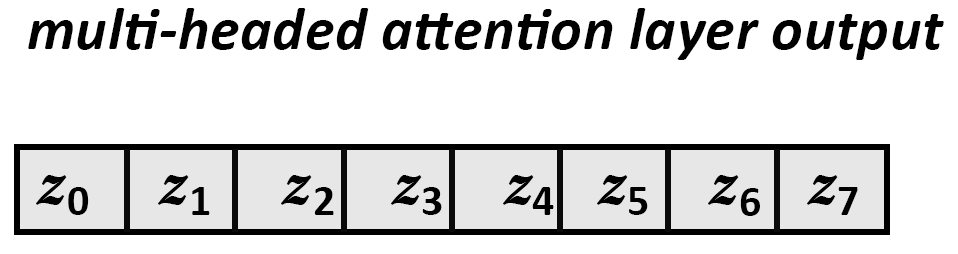

In [25]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_18.png', width=600) #This is used for rendering images in the notebook
     

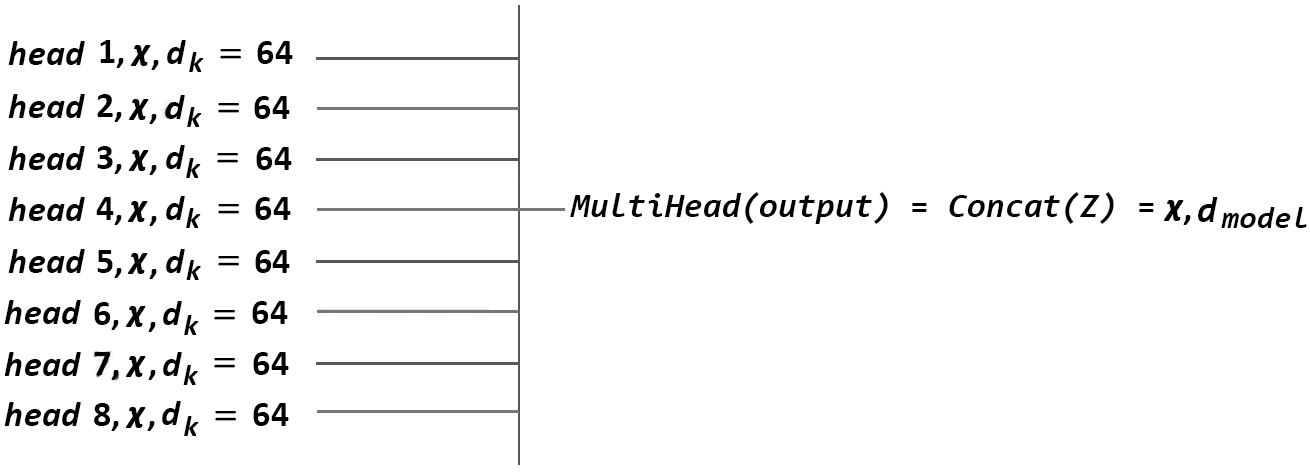

In [26]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_19.png', width=600) #This is used for rendering images in the notebook
     

## Now let's do using Hugging Face in one line...

In [27]:
from transformers import pipeline
translator = pipeline("translation_en_to_fr")
# one line of code for en to fr translation
print( translator("It is easy to translate langauges with transformers", max_length=40))

No model was supplied, defaulted to google-t5/t5-base and revision 686f1db (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/Users/jcarlson/Library/Python/3.9/lib/python/site-packages/transformers/models/t5/tokenization_t5_fast.py:171: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on google-t5/t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': 'Il est facile de traduire des langues avec des transformateurs.'}]


In [28]:
# Now that's installed, let's see a second translation 
print( translator("How about now?", max_length=40) )

[{'translation_text': "Qu'en est-il maintenant?"}]
